<h1><center>Práctica Aprendizaje Airbnb: Análisis exploratorio de los datos.</center></h1>

# Integrantes

Nuria Jiménez Carrasco, Sofía Maceín Sanz, María Araceli Pérez Buendía.

8 de junio de 2023

# Introducción

Este trabajo tiene como objetivo desarrollar un evaluador automático de precios para alojamientos utilizando un conjunto de datos extraído de Airbnb. La finalidad es brindar, a propietarios y posibles huéspedes, una herramienta útil para determinar y evaluar el precio adecuado de un alojamiento en función de sus características.

A lo largo de este trabajo, realizaremos análisis exploratorios del conjunto de datos y utilizaremos algoritmos de aprendizaje automático para entrenar y evaluar modelos predictivos. Además, identificaremos las características más influyentes en la predicción del precio y proporcionaremos recomendaciones basadas en los resultados obtenidos.

# 0. Librerías

In [1]:
# Paquetes y librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Análisis exploratorio de los datos

## 1.1 Selección de variables

Vamos a comenzar con una exploración inicial de los datos para identificar posibles cambios o transformaciones necesarias.

En primer lugar, cargamos los datos y examinamos su dimensión y estructura.

In [3]:
# Importacion de datos
df = pd.read_csv("airbnb-listings-cleaned.csv")
df_original = df.copy()

df.head(5)

,id,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10080,none,30899,Rami,2009-08-10,"Vancouver, British Columbia, Canada",within a few hours,85%,NaN,f,...,f,f,strict_14_with_grace_period,f,f,31,31,0,0,0.18
1,11400,none,42305,Jaynne,2009-09-30,"Vancouver, British Columbia, Canada",NaN,NaN,NaN,f,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,0.64
2,13188,none,51466,Family Guns,2009-11-04,"Vancouver, British Columbia, Canada",within an hour,100%,NaN,t,...,t,f,moderate,f,f,1,1,0,0,1.51
3,13357,none,52118,Liliana,2009-11-07,"Vancouver, British Columbia, Canada",within an hour,100%,NaN,f,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.51
4,13358,none,52116,Lynn,2009-11-07,"Vancouver, British Columbia, Canada",NaN,NaN,NaN,f,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.65


In [4]:
# Dimension de los datos
df.shape

(4837, 82)

Tenemos un total de 4837 registros y 82 variables en el conjunto de datos. Cada una de estas variables se encuentra explicada en el archivo _README_ proporcionado.

Vamos a analizar los tipos de variables en nuestro conjunto de datos y verificar si existen valores nulos. Esto nos permitirá tener una mejor comprensión de la calidad e integridad de los datos.

In [5]:
# Tipo de las variables y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4837 entries, 0 to 4836
Data columns (total 82 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4837 non-null   int64  
 1   experiences_offered                           4837 non-null   object 
 2   host_id                                       4837 non-null   int64  
 3   host_name                                     4836 non-null   object 
 4   host_since                                    4836 non-null   object 
 5   host_location                                 4830 non-null   object 
 6   host_response_time                            2731 non-null   object 
 7   host_response_rate                            2731 non-null   object 
 8   host_acceptance_rate                          0 non-null      float64
 9   host_is_superhost                             4836 non-null   o

**Selección de variables**

Consideramos para el estudio cualitativo del host todas las variables relacionadas en él:

- host_id
- host_name  
- host_since      
- host_location
- host_response_time
- host_response_rate      
- host_is_superhost
- host_neighbourhood
- host_listings_count
- host_total_listings_count      
- host_has_profile_pic
- host_identity_verified

Consideramos que las siguientes variables relevantes para el modelo son:

- latitude
- longitude
- room_type
- accommodates
- bathrooms
- bedrooms
- beds
- price
- security_deposit
- cleaning_fee
- guests_inclueded
- extra_people
- minimum_nights
- maximum_nights
- number_of_reviews
- review_scores_accuracy                  
- review_scores_cleanliness                   
- review_scores_checkin                  
- review_scores_communication        
- review_scores_location    

Estas variables han sido elegidas en base a su potencial para influir en la predicción del precio de los alojamientos. 

En primer lugar, creamos el dataframe para realizar el estudio exploratorio del host. Este dataframe contiene las variables relacionadas en el mismo.

In [6]:
# Dataframe para el estudio cualitativo del host
col_host = [0,2,3,4,5,6,7,9,10,11,12,13,14]
df_host = df.iloc[:,col_host]

# Indexacion
df_host = df_host.set_index('id')
df_host.head(1)

,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified
id,,,,,,,,,,,,
10080,30899,Rami,2009-08-10,"Vancouver, British Columbia, Canada",within a few hours,85%,f,Coal Harbour,31.0,31.0,t,t


Por otro lado, creamos el dataframe para realizar el estudio de los precios. Este dataframe contiene las variables relevantes para el proceso de tasación de alojamientos y, además, nos permitirá entrenar y evaluar modelos para predecir el precio.

In [7]:
# Dataframe para el estudio
col_tasa = [0,26,27,30,31,32,33,34,37,40,41,42,43,44,45,59,64,65,66,67,68]
df = df.iloc[:,col_tasa]

In [8]:
# Comprobacion de que el indice es valido
df['id'].isnull().sum()
df['id'].duplicated().sum()

# Cambio de indexacion
df = df.set_index('id')
df_original = df_original.set_index('id')

df.head(1)

,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
id,,,,,,,,,,,,,,,,,,,,
10080,49.287716,-123.121103,Entire home/apt,6,2.0,2.0,4.0,295.0,0.0,195.0,1,$0.00,60,1124,16,9.0,9.0,10.0,9.0,10.0


## 1.2 Transformación de variables

Realizamos algunas transformaciones en las variables para mejorar su representación y/o para adaptarlas mejor a nuestros análisis.

### 1.2.1 Transformaciones en el dataframe del host

En primer lugar, a partir de la variables _host_since_, creamos una variable llamada _host_for_  que representa la cantidad de años que siendo host.

In [9]:
# Se mantiene solo el año de host_since 
df_host['host_since'] = pd.to_datetime(df_host['host_since'], errors='coerce')
df_host['host_since'] = df_host['host_since'].dt.year
df_host['host_since'] = 2019 - df_host['host_since'].values
df_host = df_host.rename(columns={'host_since': 'host_for'})

Por otro lado, realizamos la binarización de las variables que toman valores "t" (verdadero) y "f" (falso).

In [10]:
# Cambio de variables dicotomicas a binario 1:t y 0:f
df_host['host_is_superhost'] = df_host['host_is_superhost'].map({"t":1, "f":0})
df_host['host_has_profile_pic'] = df_host['host_has_profile_pic'].map({"t":1, "f":0})
df_host['host_identity_verified'] = df_host['host_identity_verified'].map({"t":1, "f":0})

Por último, realizamos una transformación en los valores de la variable _host_response_time_ para convertirlos en valores numéricos escalados entre $0$ y $1$.

In [11]:
# Cambio de host_response_time a tasa
df_host['host_response_rate'] = df_host['host_response_rate'].str.replace('%','').astype('float64')
df_host['host_response_rate'] = df_host['host_response_rate']/100

Así pues, nuestro dataframe queda de la siguiente forma:

In [12]:
df_host.head(2)

,host_id,host_name,host_for,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified
id,,,,,,,,,,,,
10080,30899,Rami,10.0,"Vancouver, British Columbia, Canada",within a few hours,0.85,0.0,Coal Harbour,31.0,31.0,1.0,1.0
11400,42305,Jaynne,10.0,"Vancouver, British Columbia, Canada",NaN,NaN,0.0,Riley Park,1.0,1.0,1.0,1.0


### 1.2.2 Transformaciones en el dataframe de estudio

Continuamos con el dataframe para el estudio.

En primer lugar, procedemos a crear variables _dummy_ para la variable _room_type_, que toma tres valores: "Entire home/apt", "Private room" y "Shared room".

In [13]:
# Cambio de la variable room_type a dummies segun las 3 categorias
df['room_type'].value_counts()
df_rooms = pd.get_dummies(df[['room_type']], prefix = "", prefix_sep = "")
df = pd.concat([df,df_rooms], axis=1)
df.drop(['room_type'], axis = 1, inplace = True)

Convertimos la variable _extra_people_ a un tipo de dato numérico (float).

In [14]:
# Cambio de la variable extra_people a dtype=float64
df['extra_people'] = df['extra_people'].str.replace('$','').astype('float64')

Al observar el dataframe, parece haber entradas donde la variable _accommodates_ toma valores inferiores a la variable _beds_. Si esto es así, implica que hay ofertas donde hay más camas disponibles que personas permitidas. En ese caso, decidimos cambiar la variable _accommodates_ al número mínimo de personas necesarias para cubrir todas las camas, es decir,


$$\text{accommodates} = \text{beds} - \text{guests\_included}$$

In [15]:
# Comprobacion de que existen ofertas donde hay mas camas que gente admitida
df[df['beds']>df['accommodates']+df['guests_included']][['accommodates','beds','guests_included']]

,accommodates,beds,guests_included
id,,,
12391067,2,5.0,1
13456176,2,5.0,2
14202073,2,5.0,1
15288267,2,5.0,1
15508214,4,6.0,1
16219066,2,5.0,1
19589647,10,25.0,8
20235568,2,5.0,2
23340054,2,5.0,1


In [16]:
# Se reemplaza 'accommodates' por el numero minimo de personas necesarias para cubrir las camas
df['accommodates'] = np.where(df['beds'] > df['accommodates']+df['guests_included'], df['beds']-df['guests_included'], df['accommodates'])

Por último, realizamos un estudio para determinar cuántos casos del tipo <<haber más invitados que personas que pueden alojarse>> existen. Además, examinamos el tipo de alojamiento en el que ocurre esta situación.

In [17]:
# Comprobacion del tipo de alojamiento en el caso de que haya mas invitados que personas que pueden alojarse
indices = df[df['guests_included']>df['accommodates']].index
df_original.loc[indices,:]['property_type'].value_counts()

House                 20
Condominium            7
Serviced apartment     4
Guest suite            4
Apartment              4
Loft                   2
Townhouse              1
Name: property_type, dtype: int64

En la mayoría de los casos, se observa que esta situación ocurre en alojamientos de grandes dimensiones, lo cual indica que hay un número significativo de camas disponibles en comparación con el número de invitados. Este hallazgo nos sugiere la necesidad de realizar un estudio más exhaustivo para comprender mejor las características y peculiaridades de estos alojamientos.

## 1.3  Análisis descriptivo

**Estudio cualitativo del host**

En primer lugar, podemos investigar las características de los host que aparecen como *super_host*.

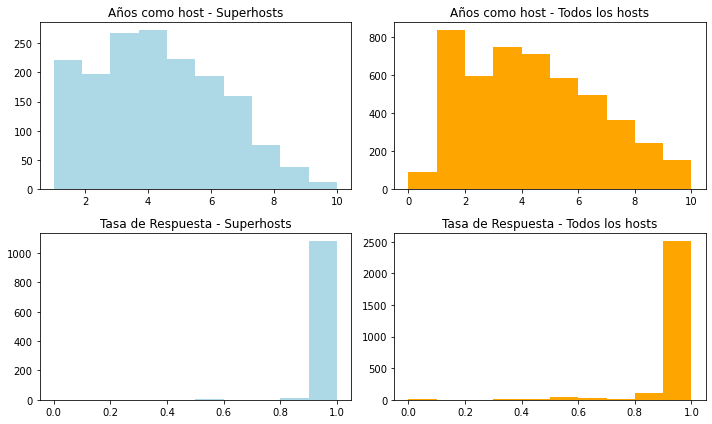

In [18]:
# Superhost
superhost = df_host[df_host['host_is_superhost'] == 1.0]

# Graficos comparacion
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# 'host_for'
axs[0][0].hist(superhost['host_for'], bins=10, color='lightblue')
axs[0][0].set_title('Años como host - Superhosts')

axs[0][1].hist(df_host['host_for'], bins=10,  color='orange')
axs[0][1].set_title('Años como host - Todos los hosts')

# 'host_response_rate'
axs[1][0].hist(superhost['host_response_rate'], bins=10, color='lightblue')
axs[1][0].set_title('Tasa de Respuesta - Superhosts')

axs[1][1].hist(df_host['host_response_rate'], bins=10, color='orange')
axs[1][1].set_title('Tasa de Respuesta - Todos los hosts')

fig.tight_layout()

plt.show()

En segundo lugar, podemos estudiar la relación entre las caraterísticas *host_has_profile_pic* y *host_identity_verified* con el resto de variables.

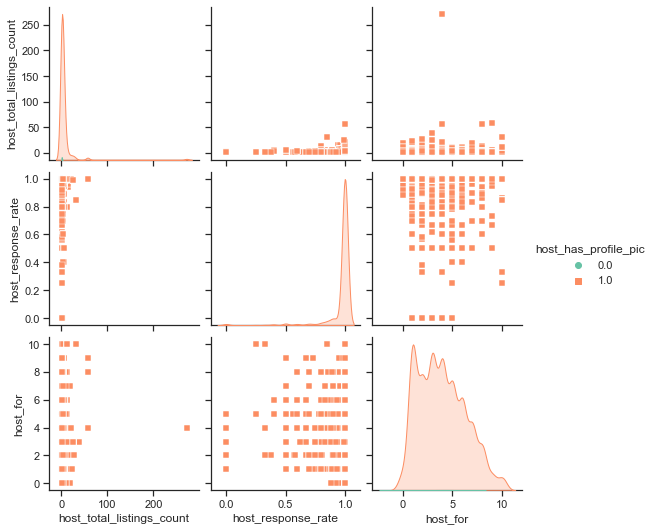

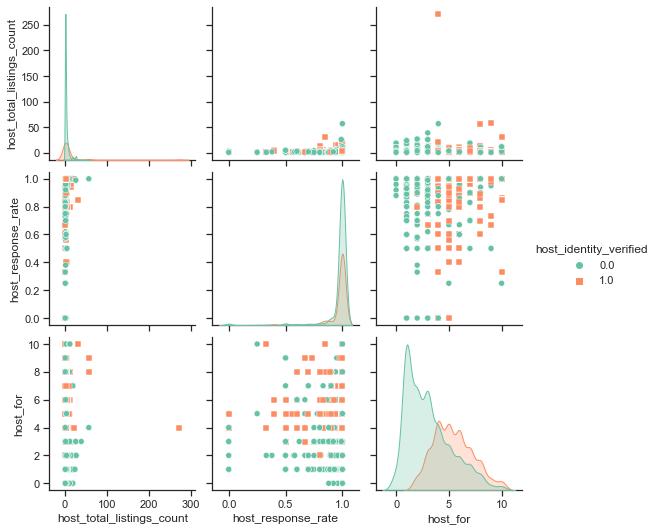

In [19]:
# Categorias 'host_has_profile_pic' y 'host_'
df_host['host_has_profile_pic'] = df_host['host_has_profile_pic'].astype('category')
df_host['host_identity_verified'] = df_host['host_identity_verified'].astype('category')

# Graficos de relacion entre variables 
data = df_host[['host_has_profile_pic', 'host_identity_verified', 'host_total_listings_count', 'host_response_rate', 'host_for', 'host_name', 'host_location']]

sns.set(style="ticks")
sns.pairplot(data, hue='host_has_profile_pic', markers=["o", "s"], palette='Set2')
sns.pairplot(data, hue='host_identity_verified', markers=["o", "s"], palette='Set2')

plt.show()

**Estudio de las variables para los modelos de aprendizaje automático**

Vemos algunos estadísticos de los datos y estudiamos la distribución de las variables mediante los histogramas.

In [20]:
# Estadisticos descriptivos
df.drop(columns=['latitude', 'longitude']).iloc[:,0:12].describe()

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews
count,4837.000000,4837.000000,4835.000000,4831.000000,4837.000000,4052.000000,4423.000000,4837.000000,4837.000000,4837.00000,4837.000000,4837.000000
mean,3.517056,1.320136,1.469493,1.869178,163.807732,373.262833,79.491296,1.909861,16.060161,12.60492,704.200331,33.106678
std,2.332824,0.667160,1.059685,1.269757,199.445018,507.081634,61.085880,1.576732,26.360474,31.39955,1553.291668,50.773771
min,1.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,80.000000,125.000000,38.000000,1.000000,0.000000,1.00000,60.000000,3.000000
50%,3.000000,1.000000,1.000000,1.000000,119.000000,250.000000,65.000000,1.000000,10.000000,2.00000,1125.000000,14.000000
75%,4.000000,1.500000,2.000000,2.000000,196.000000,500.000000,100.000000,2.000000,25.000000,30.00000,1125.000000,43.000000
max,17.000000,8.000000,30.000000,25.000000,6500.000000,6561.000000,500.000000,16.000000,396.000000,998.00000,99999.000000,544.000000


In [21]:
# Estadisticos descriptivos
df.drop(columns=['latitude', 'longitude']).iloc[:,12:].describe()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,Entire home/apt,Private room,Shared room
count,4131.000000,4132.000000,4129.000000,4130.000000,4129.000000,4837.000000,4837.000000,4837.000000
mean,9.697652,9.517667,9.781061,9.804843,9.665779,0.695886,0.296258,0.007856
std,0.682427,0.841566,0.567635,0.578685,0.611734,0.460079,0.456653,0.088295
min,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,10.000000,9.000000,10.000000,10.000000,9.000000,0.000000,0.000000,0.000000
50%,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000


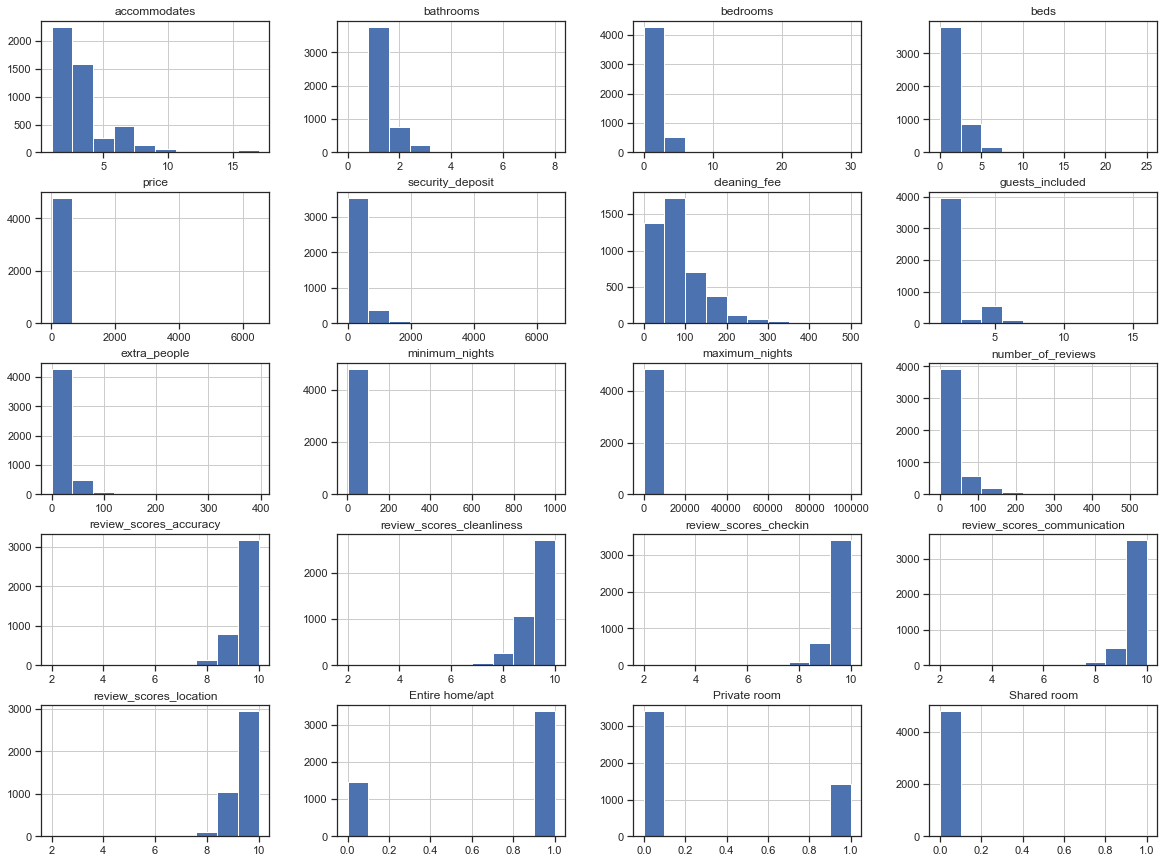

In [22]:
# Histograma de las variables
df.drop(columns=['latitude', 'longitude']).hist(figsize=(20,15))
plt.show()

Al observar las variables, podemos notar una gran asimetría hacia la derecha en su distribución. Por tanto, tras realizar la imputación de missings y el estudio de los outliers, se estudiará el coeficiente de asimetría y se realizarán las transformaciones necesarias.

## 1.3 Imputación de missings

Comenzamos viendo qué variables presentan valores missing.

In [23]:
# Valores missing
df.isnull().sum()

latitude                         0
longitude                        0
accommodates                     0
bathrooms                        0
bedrooms                         2
beds                             6
price                            0
security_deposit               785
cleaning_fee                   414
guests_included                  0
extra_people                     0
minimum_nights                   0
maximum_nights                   0
number_of_reviews                0
review_scores_accuracy         706
review_scores_cleanliness      705
review_scores_checkin          708
review_scores_communication    707
review_scores_location         708
Entire home/apt                  0
Private room                     0
Shared room                      0
dtype: int64

### 1.3.1 Variables 'bedrooms' y 'beds'

Para imputar los valores missing en las variables *bedrooms* y *beds*, utilizamos un modelo de regresión lineal donde las variables predictoras son *accommodates* y *bathrooms*. 

El objetivo es utilizar la relación entre las variables para estimar los valores de manera precisa. De esta forma, la regresión lineal nos permite capturar la relación lineal entre las variables predictoras y objetivo y utilizarla para predecir los valores missing.

In [24]:
# Librerias
from sklearn.linear_model import LinearRegression

En primer lugar, imputamos los valores missing en la variable **_bedrooms_**.

In [25]:
# Separacion de variables
target = 'bedrooms'
regresoras = ['accommodates', 'bathrooms']

# Dataframe con las variables seleccionadas
df_imp = df[[target] + regresoras]

# Division de los datos en dos dataframe, uno con los valores missing y otro sin valores missing
df_missing = df_imp[df_imp.isnull().any(axis=1)]
df_no_missing = df_imp.dropna()

# Ajuste del modelo de los datos sin missing
reg = LinearRegression()
reg.fit(df_no_missing[regresoras], df_no_missing[target])

# Imputacion de los valores missing y almacenamiento de los valores obtenidos en el dataframe 
pred = reg.predict(df_missing[regresoras])
df.loc[df[target].isnull(), target]= pred

Imputamos los valores missing en la variable **_beds_**.

In [26]:
# Separacion de variables
target = 'beds'
regresoras = ['accommodates', 'bathrooms']

# Dataframe con las variables seleccionadas
df_imp = df[[target] + regresoras]

# Division de los datos en dos dataframe, uno con los valores missing y otro sin valores missing
df_missing = df_imp[df_imp.isnull().any(axis=1)]
df_no_missing = df_imp.dropna()

# Ajuste del modelo de los datos sin missing
reg = LinearRegression()
reg.fit(df_no_missing[regresoras], df_no_missing[target])

# Imputacion de los valores missing y almacenamiento de los valores obtenidos en el dataframe 
pred = reg.predict(df_missing[regresoras])
df.loc[df[target].isnull(), target]= pred

### 1.3.2 Variables 'security_deposit' y 'cleaning_fee '

Consideramos que los valores NaN en las variables *security_deposit* y *cleaning_fee* corresponden a 0, ya que entendemos que no se quiere especificar ningún valor para estas variables. Es decir,  que la ausencia de un valor indica que no se cobra ninguna fianza ni tarifa de limpieza adicional.

In [27]:
# Imputacion de los valores missing
df['security_deposit'] = df['security_deposit'].replace(np.nan, 0)
df['cleaning_fee'] = df['cleaning_fee'].replace(np.nan, 0)

### 1.3.3 Variables tipo 'review_scores_'

Observamos que, cuando una variable de tipo *review_scores_* presenta valores missing, también existen valores missing en el resto variables del mismo tipo. 

In [28]:
# Comprobacion de los valores missing
review_score = ['review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                  'review_scores_communication','review_scores_location']

df[df[review_score].isna().any(axis=1)][review_score]

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
id,,,,,
48146,NaN,NaN,NaN,NaN,NaN
1126273,NaN,NaN,NaN,NaN,NaN
1229714,NaN,NaN,NaN,NaN,NaN
1620084,NaN,NaN,NaN,NaN,NaN
1660055,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
32135798,NaN,NaN,NaN,NaN,NaN
32151243,NaN,NaN,NaN,NaN,NaN
32152929,NaN,NaN,NaN,NaN,NaN


Debido al patrón que presentan los datos missing, decidimos eliminar las observaciones asociadas a ellos.

In [29]:
# Eliminacion de las observaciones
df = df.dropna(subset=review_score)

## 1.4 Outliers

En primer lugar, visualizamos los boxplot de cada una de las variables.

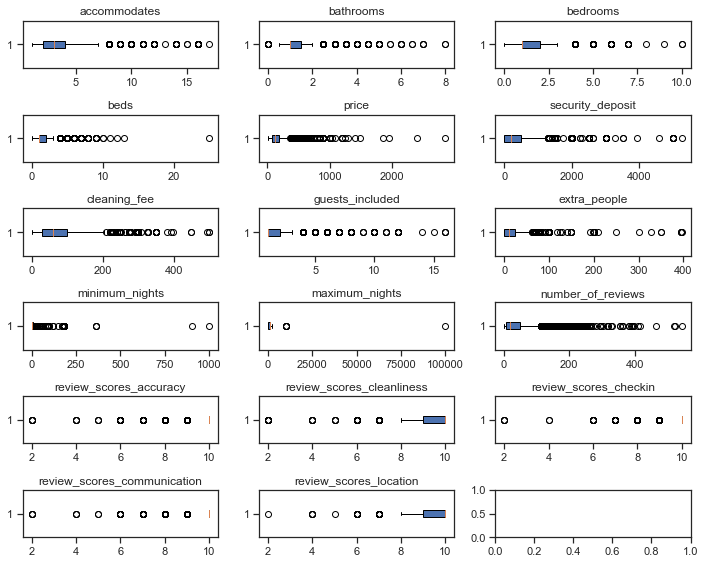

In [30]:
# Numero de filas y columnas necesarias para dibujar todos los boxplots
n_rows = 6
n_cols = 3
columnas = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee','guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location']

# Matriz de subgraficos
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 8))

# Boxplot de cada variable
for i, columna in enumerate(columnas):
    ax = axs[i // n_cols][i % n_cols]
    ax.boxplot(df[columna],vert=False,patch_artist=True) # boxplot de la variable
    ax.set_title(columna)

fig.tight_layout()

plt.show()

Para estudiar los outliers, podemos realizar un análisis conjunto con aquellas variables que tienen una mayor relación. Una forma de evaluar la relación entre variables es mediante la matriz de correlaciones.

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,maximum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,Entire home/apt,Private room,Shared room
latitude,1.000000,-0.091854,-0.068062,-0.049372,-0.142906,-0.094101,0.099694,0.132790,0.161202,-0.061709,...,0.007066,0.079285,0.033667,0.017332,-0.050066,0.038948,0.200373,0.266724,-0.277306,0.044477
longitude,-0.091854,1.000000,-0.041075,-0.084609,-0.026113,-0.026044,-0.167960,-0.049751,-0.126247,-0.014581,...,-0.014911,0.056384,0.022181,0.037941,0.024320,0.016107,-0.280161,-0.054484,0.047656,0.037587
accommodates,-0.068062,-0.041075,1.000000,0.552023,0.811762,0.838057,0.561351,0.249254,0.522610,0.599453,...,0.015292,-0.050108,-0.070669,-0.026944,-0.029805,-0.020643,0.041347,0.416291,-0.408394,-0.057324
bathrooms,-0.049372,-0.084609,0.552023,1.000000,0.629066,0.518669,0.502955,0.270065,0.461937,0.355594,...,0.003912,-0.119025,-0.075141,-0.052964,-0.036348,-0.031953,0.036811,0.122795,-0.131523,0.040499
bedrooms,-0.142906,-0.026113,0.811762,0.629066,1.000000,0.771466,0.553984,0.246299,0.504547,0.539339,...,-0.007094,-0.105486,-0.056281,-0.029619,0.005700,-0.001051,0.021775,0.275592,-0.269652,-0.041650
beds,-0.094101,-0.026044,0.838057,0.518669,0.771466,1.000000,0.508499,0.226118,0.476772,0.546593,...,0.004149,-0.059888,-0.048341,-0.015203,0.007682,0.001354,0.020159,0.337740,-0.336822,-0.018017
price,0.099694,-0.167960,0.561351,0.502955,0.553984,0.508499,1.000000,0.292320,0.525051,0.390711,...,0.003870,-0.104884,0.012297,0.026779,-0.015980,0.026476,0.113195,0.351476,-0.345494,-0.044847
security_deposit,0.132790,-0.049751,0.249254,0.270065,0.246299,0.226118,0.292320,1.000000,0.405083,0.194235,...,0.044567,-0.049730,0.004476,0.044670,-0.017904,-0.007123,0.047932,0.231378,-0.226464,-0.034591
cleaning_fee,0.161202,-0.126247,0.522610,0.461937,0.504547,0.476772,0.525051,0.405083,1.000000,0.368321,...,0.021604,-0.126151,-0.017357,0.041147,-0.023045,0.002189,0.104090,0.431257,-0.422422,-0.062785
guests_included,-0.061709,-0.014581,0.599453,0.355594,0.539339,0.546593,0.390711,0.194235,0.368321,1.000000,...,0.008247,0.006298,-0.017860,0.015701,0.018058,0.015537,0.017516,0.269419,-0.263623,-0.040658


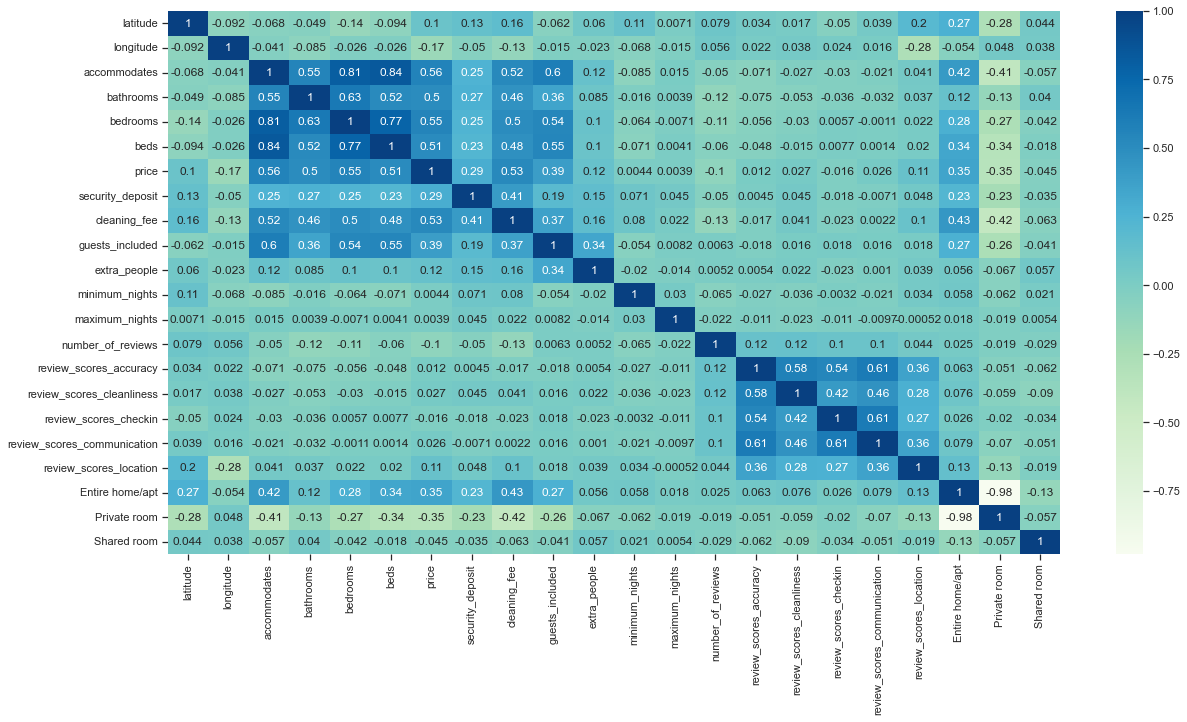

In [31]:
# Correlaciones
plt.figure(figsize=(20,10))
correlaciones= df.corr()
sns.heatmap(correlaciones,cmap="GnBu",annot=True) 
correlaciones

Dividimos las variables en distintos grupos en función de su correlación para analizarlas conjuntamente.

### 1.4.1 Variables relacionadas con la disposición del alojamiento

**Accommodate, bathrooms,  bedrooms, beds**

Primero, vamos a estudiar los outliers en las variables relativas a la disposición del alojamiento. 

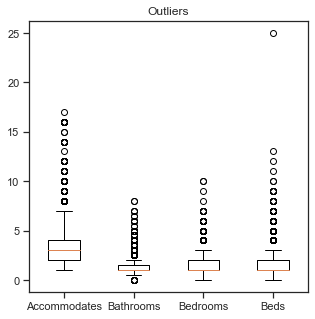

In [32]:
# Boxplot de las habitaciones
fig = plt.figure(figsize = (5,5))

plt.boxplot(df[['accommodates', 'bathrooms','bedrooms', 'beds']])
plt.title('Outliers')
plt.xticks([1,2,3,4], ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds'])

plt.show()

Para estudiar los outliers en conjunto, empleamos la librería *PyOD* que posee estrategias para su detección. En este caso, empleamos el algoritmo de KNN.

In [ ]:
# !pip install pyod

In [33]:
# Librerias
from pyod.models.knn import KNN

In [34]:
# Deteccion de outliers
A = df[['accommodates','bathrooms','bedrooms', 'beds', 'Entire home/apt', 'Private room']]
clf = KNN(contamination=0.01)
clf.fit(A)

# Outliers
y_pred = clf.predict(A)
outliers = A[y_pred == 1]

# Tipo de alojamiento
indices = outliers.index
outliers['property_type'] = df_original.loc[indices,:]['property_type']
outliers

,accommodates,bathrooms,bedrooms,beds,Entire home/apt,Private room,property_type
id,,,,,,,
1096393,10.0,1.0,10.0,1.0,1,0,Apartment
6830599,16.0,3.0,4.0,7.0,1,0,Villa
15735770,14.0,3.0,5.0,10.0,1,0,House
15987030,1.0,8.0,1.0,1.0,0,1,Apartment
16606630,13.0,1.0,3.0,3.0,1,0,Apartment
16689567,10.0,3.0,5.0,9.0,1,0,House
17347671,14.0,2.5,3.0,7.0,1,0,Townhouse
17848238,10.0,2.0,2.0,2.0,1,0,House
19589647,17.0,3.5,5.0,25.0,1,0,House


En el caso de los apartamentos, es menos común encontrar alojamientos con un alto número de posibles huéspedes debido a las limitaciones de espacio. Por lo tanto, podemos considerar estos como outliers.

In [35]:
# Comprobacion outliers
outliers[outliers['property_type']=='Apartment']

,accommodates,bathrooms,bedrooms,beds,Entire home/apt,Private room,property_type
id,,,,,,,
1096393,10.0,1.0,10.0,1.0,1,0,Apartment
15987030,1.0,8.0,1.0,1.0,0,1,Apartment
16606630,13.0,1.0,3.0,3.0,1,0,Apartment


Parece que las observaciones tienen información inconsistente o inusual. Por ejemplo,

- En el primer caso, parece que se trata de un apartamento con 10 habitaciones y posiblemente 1 cama y 1 baño por habitación.
- En el segundo caso, parece que se trata de una habitación privada en un apartamento.

Decidimos eliminar las observaciones ya que pueden introducir ruido o sesgo en el análisis.

In [37]:
# Eliminacion de las observaciones correspondientes con apartamentos
indices_apt = outliers[outliers['property_type']=='Apartment'].index
df.drop(indices_apt, inplace = True)

### 1.4.2 Variables relacionadas con tasas extra

**Security deposit**

Analizamos la distribución de la variable *security_deposit* y buscamos posibles valores atípicos.

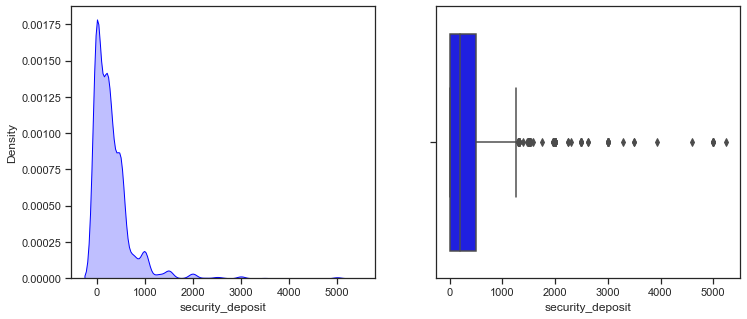

In [38]:
# Distribucion y boxplot de security deposit
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['security_deposit'], shade=True, color='blue',ax=axes[0])
sns.boxplot(df['security_deposit'], color='blue', ax=axes[1])

plt.show()

In [39]:
# Cuantiles de la variable
df['security_deposit'].quantile([0.25,0.5, 0.75, 0.95, 0.99])

0.25       0.0
0.50     200.0
0.75     500.0
0.95    1000.0
0.99    2000.0
Name: security_deposit, dtype: float64

Las fianzas altas, en el contexto de alojamientos, suelen estar relacionadas con estancias más prolongadas o propiedades de mayores dimensiones. Podemos considerar como "fianzas altas" aquellos valores que se encuentren por encima del percentil 0,95 de la variable *security_deposit*.

In [40]:
# Dataframe con fianzas por encima del cuantil 95
q95 = df['security_deposit'].quantile(0.95) 
df_fianza = df[df['security_deposit']>=q95][['minimum_nights','maximum_nights', 
                                             'price','security_deposit','Entire home/apt', 'Private room', 'Shared room']]
indices = df_fianza.index
df_fianza['property_type'] = df_original.loc[indices]['property_type']
df_fianza

,minimum_nights,maximum_nights,price,security_deposit,Entire home/apt,Private room,Shared room,property_type
id,,,,,,,,
14508,90,365,140.0,1000.0,1,0,0,Apartment
26047,30,365,159.0,1000.0,1,0,0,Apartment
26234,30,730,169.0,1000.0,1,0,0,Apartment
42645,30,730,159.0,1000.0,1,0,0,Condominium
54261,90,365,98.0,1500.0,1,0,0,Condominium
...,...,...,...,...,...,...,...,...
30914254,2,200,98.0,2500.0,1,0,0,Apartment
31044697,2,1125,600.0,1000.0,1,0,0,Apartment
31212290,2,27,1488.0,1000.0,1,0,0,House


Podemos considerar como outliers aquellos casos en los que los valores de la variable *security_deposit* sean significativamente altos, pero que no estén asociados a estancias prolongadas o a alojamientos de grandes dimensiones.

In [41]:
# Tipos de alojamiento
df_fianza['property_type'].value_counts()

House                 95
Condominium           78
Apartment             54
Loft                  16
Serviced apartment    11
Townhouse             10
Guest suite            8
Guesthouse             3
Villa                  3
Other                  2
Camper/RV              1
Name: property_type, dtype: int64

Este dataframe muestra aquellas observaciones que no corresponden con estancias prolongadas (menos de 4 meses) ni alojamientos de grandes dimensiones (apartamento, loft y otros). Consideramos que son outliers y los eliminamos.

In [42]:
# Dataframe con estancias de menos de 4 meses y tipo de alojamiento pequeño
df_fianza[(df_fianza['maximum_nights']<(30*4)) & 
          ((df_fianza['property_type']=='Apartment') | (df_fianza['property_type']=='Loft') | (df_fianza['property_type']=='Other'))]

,minimum_nights,maximum_nights,price,security_deposit,Entire home/apt,Private room,Shared room,property_type
id,,,,,,,,
1678196,2,60,150.0,1000.0,1,0,0,Apartment
1764095,30,90,171.0,1575.0,1,0,0,Apartment
3448674,2,21,199.0,1500.0,1,0,0,Loft
6975300,10,89,249.0,1999.0,1,0,0,Loft
7162553,7,30,196.0,1000.0,1,0,0,Loft
8868498,1,27,150.0,1000.0,1,0,0,Other
10837935,1,30,282.0,1500.0,1,0,0,Loft
12052091,61,90,91.0,1400.0,1,0,0,Apartment
19118514,2,90,320.0,1200.0,1,0,0,Apartment


In [43]:
# Eliminacion de las observaciones que no son largas estancias o grandes alojamientos
indices_est = df_fianza[(df_fianza['maximum_nights']<(30*4)) & 
                        ((df_fianza['property_type']=='Apartment') | (df_fianza['property_type']=='Loft') | (df_fianza['property_type']=='Other'))].index
df.drop(indices_est, inplace = True)

**Cleaning fee**

Analizamos la distribución de la variable *cleaning_fee* y buscamos posibles valores atípicos.

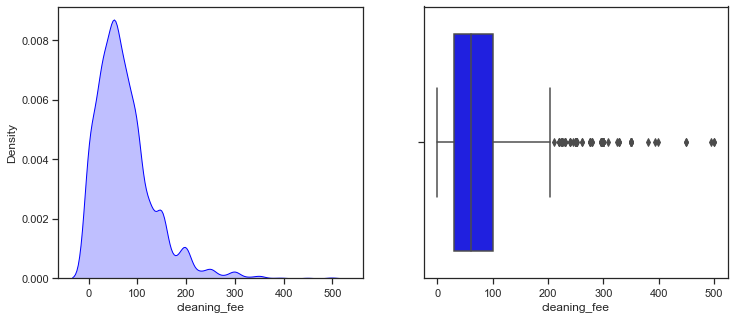

In [44]:
# Distribucion y boxplot de cleaning fee
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['cleaning_fee'], shade=True, color='blue',ax=axes[0])
sns.boxplot(df['cleaning_fee'], color='blue', ax=axes[1])

plt.show()

Visualizamos las tasas de limpieza para los distintos tipos de alojamiento mediante un gráfico de dispersión.

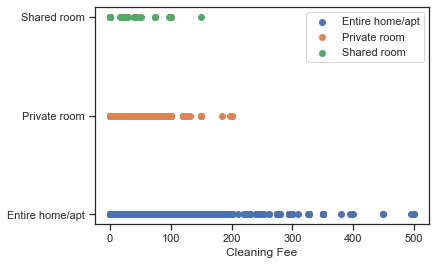

In [45]:
# Grafico de dispersion
fig, axs = plt.subplots()

axs.scatter(df[df['Entire home/apt'] == 1]['cleaning_fee'], [1] * len(df[df['Entire home/apt'] == 1]), label='Entire home/apt')
axs.scatter(df[df['Private room'] == 1]['cleaning_fee'], [2] * len(df[df['Private room'] == 1]), label='Private room')
axs.scatter(df[df['Shared room'] == 1]['cleaning_fee'], [3] * len(df[df['Shared room'] == 1]), label='Shared room')

axs.set_xlabel('Cleaning Fee')
axs.set_yticks([1, 2, 3])
axs.set_yticklabels(['Entire home/apt', 'Private room', 'Shared room'])

axs.legend()

plt.show()

Para ver los posibles valores atípicos, estudiamos la relación entre *cleaning_fee* y *review_scores_cleanliness*.

Un gráfico de dispersión nos permite visualizar la relación entre las dos variables en un plano cartesiano, donde el eje x representa los valores de *cleaning_fee* y el eje y representa los valores de *review_scores_cleanliness*. Esto nos permite identificar cualquier patrón o tendencia en la relación entre las dos variables y detectar posibles valores atípicos.

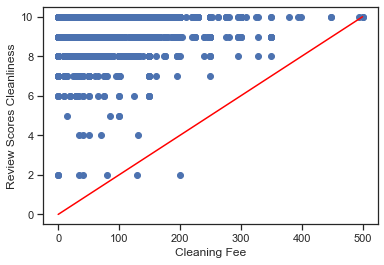

In [46]:
# Relacion cleaning_fee y review_score_cleanliness
plt.scatter(df['cleaning_fee'],df['review_scores_cleanliness'])

plt.plot( [0, 500],  [0, 10] , color='red')
plt.xlabel('Cleaning Fee')
plt.ylabel('Review Scores Cleanliness')

plt.show()

Consideramos que todos los datos que estén por debajo de la recta son outliers y decidimos eliminarlos.

In [47]:
# Eliminacion de las observaciones
indices = df[(df['cleaning_fee']>100)&(df['review_scores_cleanliness']<3)].index
df.drop(indices, inplace=True)

**Guests included**

Analizamos la distribución de la variable *guests_included* y buscamos posibles valores atípicos.

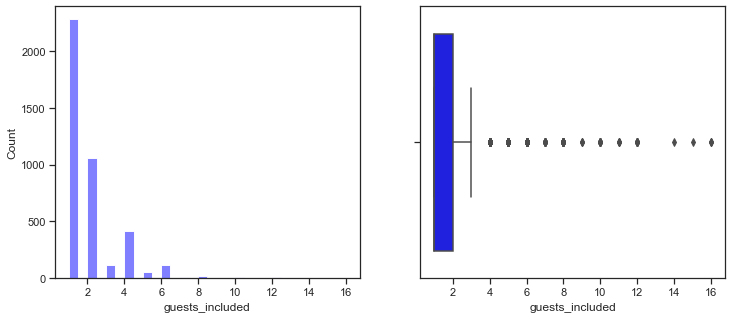

In [48]:
# Distribucion y boxplot de guests_included
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['guests_included'], bins=30, alpha=0.5, color='blue', ax=axes[0])
sns.boxplot(df['guests_included'], color='blue', ax=axes[1])

plt.show()

Consideramos outliers aquellos casos en los que el número de invitados supera el doble del número de huéspedes permitidos en el alojamiento.

In [49]:
# Dataframe con posibles valores atipicos de guests_included
outliers_guests = df[df['guests_included']>2*df['accommodates']][['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
                                               'guests_included', 'Entire home/apt', 'Private room']]
outliers_guests

,accommodates,bathrooms,bedrooms,beds,price,guests_included,Entire home/apt,Private room
id,,,,,,,,
1032892,2.0,1.0,1.0,1.0,94.0,15,0,1
17844795,2.0,1.0,1.0,1.0,199.0,6,0,1
21968371,2.0,1.0,1.0,1.0,39.0,10,0,1
23810907,2.0,1.0,1.0,1.0,98.0,10,0,1


Eliminamos las observaciones.

In [50]:
# Eliminacion de las observaciones
df.drop(outliers_guests.index, inplace=True)

**Extra people**

Analizamos la distribución de la variable *extra_people* y buscamos posibles valores atípicos.

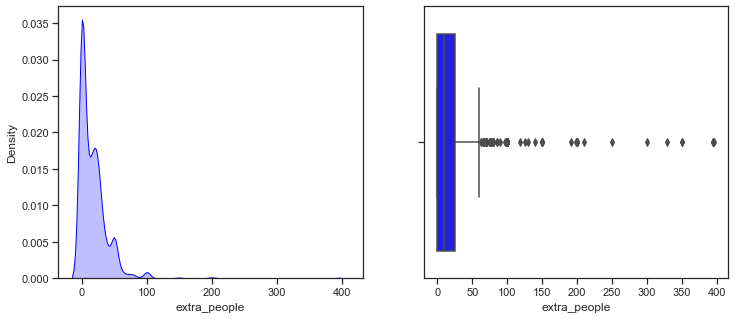

In [51]:
# Distribucion y boxplot de extra_people
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['extra_people'], shade=True, color='blue',ax=axes[0])
sns.boxplot(df['extra_people'], color='blue', ax=axes[1])

plt.show()

In [52]:
# Cuantiles de la variable
df['extra_people'].quantile([0.25,0.5, 0.75, 0.95, 0.99])

0.25      0.0
0.50     10.0
0.75     25.0
0.95     50.0
0.99    100.0
Name: extra_people, dtype: float64

Podemos considerar "precio por persona extra alto" a aquellos valores que se encuentren por encima del percentil 0,99 de la variable *extra_people*.

In [53]:
# Dataframe con posibles outliers de extra_people
q99 = df['extra_people'].quantile(0.99)
outliers_extra = df[df['extra_people']>q99][['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'extra_people', 
                            'Entire home/apt', 'Private room', 'Shared room']]
outliers_extra

,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,Entire home/apt,Private room,Shared room
id,,,,,,,,,,
2460888,2.0,1.0,1.0,1.0,197.0,2,328.0,1,0,0
2675179,4.0,2.0,2.0,2.0,450.0,4,350.0,1,0,0
2703279,6.0,2.0,3.0,4.0,500.0,6,395.0,1,0,0
5538655,4.0,1.0,2.0,2.0,81.0,4,200.0,1,0,0
6249125,4.0,1.0,1.0,2.0,249.0,2,191.0,1,0,0
12603779,2.0,1.0,1.0,1.0,100.0,2,395.0,1,0,0
13291492,2.0,1.0,1.0,1.0,199.0,2,199.0,1,0,0
13620049,3.0,2.0,2.0,2.0,350.0,3,250.0,1,0,0
14074129,2.0,1.0,1.0,2.0,98.0,2,118.0,1,0,0


Al identificar y analizar estos casos de precios por persona extra altos, no encontramos ningún patrón que explique estos valores inusuales.

### 1.4.3 Variables relacionadas las reseñas

Las reseñas de los alojamientos son subjetivas y pueden presentar mucha variabilidad. Es posible que un alojamiento esté ubicado en una zona privilegiada pero reciba críticas negativas en términos de limpieza u otros aspectos.

**Variables de tipo review_score_**

Calculamos la puntuación media según el tipo de habitación a modo de ilustración.

<Figure size 864x360 with 0 Axes>

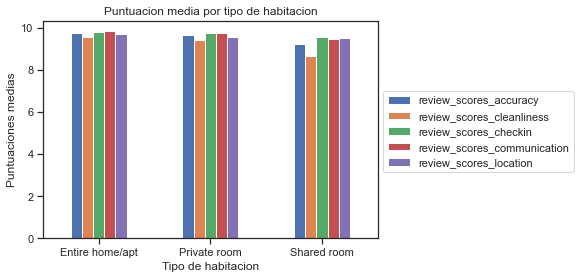

In [54]:
# Dataframe con las variables review
reviews = df[['number_of_reviews','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
              'review_scores_communication', 'review_scores_location']]

indices_reviews = reviews.index
reviews['room_type'] = df_original.loc[indices_reviews,:]['room_type']

# Valoraciones media segun el tipo de habitacion    
df_media = reviews.groupby(['room_type']).mean()
df_media.drop('number_of_reviews', axis=1, inplace=True)

# Grafico puntuaciones medias
plt.figure(figsize=(12, 5))

df_media.plot(kind='bar', ylabel='Puntuaciones medias',xlabel='Tipo de habitacion',title='Puntuacion media por tipo de habitacion')
plt.legend(bbox_to_anchor=(1, 0, 0, 0.7));plt.xticks(rotation=0)

plt.show()

### 1.4.4 Variables relacionadas con las noches

**minimum_nights**

Para analizar la variable *minimum_nights*, calculamos estadísticos descriptivos que nos proporcionan información sobre su distribución y los posibles valores atípicos.

In [55]:
# Estadisticos descriptivos
df['minimum_nights'].describe()

count    4108.000000
mean       10.824732
std        29.244450
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max       998.000000
Name: minimum_nights, dtype: float64

Podemos observar que hay un valor máximo de 998 noches, que parece ser bastante atípico en comparación con el resto de los datos. Podría haber ocurrido algún error o registro incorrecto en esa observación en particular.

In [56]:
# Valores atipicos
df[df['minimum_nights']>=900][['minimum_nights', 'maximum_nights']]

,minimum_nights,maximum_nights
id,,
13771205,998,999
15819364,900,901


Podemos observar que la duración de estas estancias es muy particular. Analizamos si existen casos similares.

In [57]:
# Intervalos de un dia entre min y max
df[df['maximum_nights']-df['minimum_nights']<2][['minimum_nights', 'maximum_nights']]

,minimum_nights,maximum_nights
id,,
11400,364,364
13357,30,30
1191143,3,3
7787575,98,99
11102652,365,365
11949456,2,3
12434489,1,1
13771205,998,999
13817015,30,30


Decidimos eliminar aquellas observaciones del conjunto anterior en las cuales la duración de la estancia no sea exactamente 30 días o múltiplos de dicho valor.

In [58]:
# Indices de las observaciones que se van a eliminar
outliers_min = df[df['maximum_nights']-df['minimum_nights']<2][['minimum_nights', 'maximum_nights']]
indices_min = [1191143, 7787575, 11949456, 12434489, 13771205, 15819364, 15840160,
17438123, 18638835, 19101912, 25011581, 25750741, 25887824, 26424386,
28765752]

# Eliminacion de las observaciones
df.drop(indices_min, inplace = True)

Por último, analizamos la distribución de la variable.

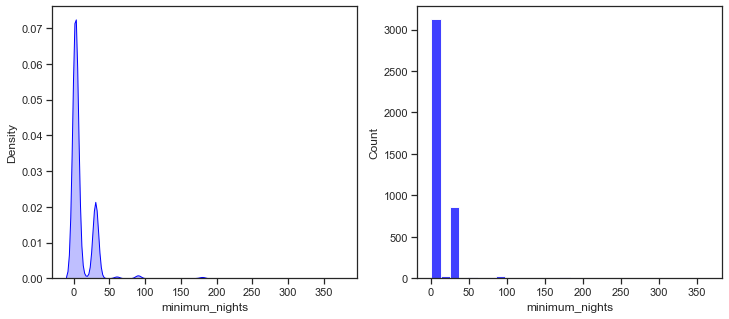

In [59]:
# Distribucion y boxplot de minimum_nights
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['minimum_nights'], shade=True, color='blue', ax=axes[0])
sns.histplot(df['minimum_nights'], color='blue', bins = 30, ax=axes[1])

plt.show()

Podemos observar la presencia de dos picos en la distribución. Uno corresponde a los alquileres por noche, con una duración mínima de 1 noche, y el otro corresponde a los alquileres por meses, con una duración mínima de 30 noches.

Es importante destacar que algunos alojamientos pueden requerir una estancia mínima de varios meses. Por lo tanto, no consideramos que ninguno de los casos mencionados sea un valor atípico.

**maximum_nights**

Para analizar la variable *maximum_nights*, podemos calcular estadísticos descriptivos que nos proporcionen información sobre su distribución y los posibles valores atípicos.

In [60]:
# Estadisticos descriptivos
df['maximum_nights'].describe()

count     4093.000000
mean       704.029807
std       1668.408412
min          3.000000
25%         52.000000
50%       1125.000000
75%       1125.000000
max      99999.000000
Name: maximum_nights, dtype: float64

Podemos observar que existe una alta concentración de observaciones en el valor 1125. Esto sugiere que este podría ser un valor por defecto utilizado en los casos en los que no se especifica un límite máximo de noches.

Decidimos imputar el valor 1125 como límite máximo para el número de noches.

In [61]:
# Imputacion de cota maxima
df.loc[df['maximum_nights'] > 1125, 'maximum_nights'] = 1125

Analizamos la distribución del número máximo de noches.

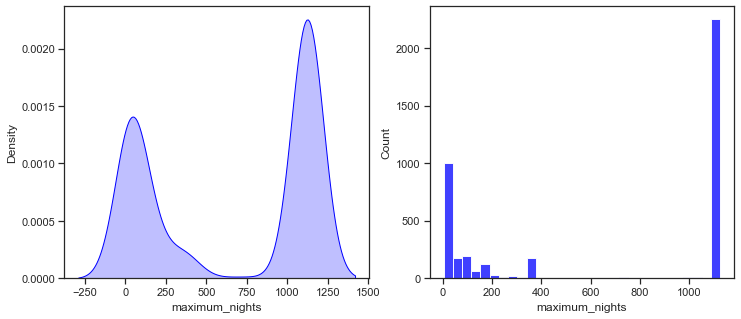

In [62]:
# Distribucion de maximum_nights
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['maximum_nights'], shade=True, color='blue', ax=axes[0])
sns.histplot(df['maximum_nights'], color='blue', bins = 30, ax=axes[1])

plt.show()

Nuevamente, podemos observar que existen 2 picos. El primero corresponde a estancias de corta duración y el segundo a estancias de larga duracion.

## 1. 5 Transformaciones 

Como mencionamos previamente, es importante tener en cuenta que las variables en nuestro conjunto de datos presentan asimetría, lo cual puede afectar negativamente en el rendimiento de los modelos de regresión. Una forma de cuantificar esta asimetría es a través del coeficiente de asimetría de Fisher, que proporciona una medida de la centralidad de los datos.

El coeficiente de asimetría de Fisher es igual a $0$ cuando los datos están centrados alrededor de la media. Si el coeficiente es positivo, indica que los datos presentan asimetría hacia la derecha, es decir, hay una cola larga en el lado derecho de la distribución. Por otro lado, si el coeficiente es negativo, indica una asimetría hacia la izquierda, con una cola larga en el lado izquierdo de la distribución.

In [63]:
# Simetria
df.skew(axis=0)

latitude                       -0.793538
longitude                      -0.023926
accommodates                    2.161514
bathrooms                       3.204828
bedrooms                        1.915946
beds                            3.351313
price                           5.414590
security_deposit                4.479302
cleaning_fee                    1.705605
guests_included                 2.841924
extra_people                    5.938725
minimum_nights                  6.851736
maximum_nights                 -0.293540
number_of_reviews               3.099863
review_scores_accuracy         -3.814141
review_scores_cleanliness      -2.898199
review_scores_checkin          -4.588931
review_scores_communication    -5.163529
review_scores_location         -2.902228
Entire home/apt                -0.870527
Private room                    0.910270
Shared room                    11.363738
dtype: float64

Para aboradar esta asimetría, aplicamos transformaciones logarítmicas a las variables continuas con sesgo positivo.

Dado que el conjunto de datos presenta el valor $0$ (aunque no hay valores negativos) tenemos que considerar una de las siguientes dos opciones:

* En primer lugar, podemos aplicar la transformación logarítmica tras agregar una constante a los valores, es decir, aplicar una transformación del tipo $log(x+1)$.
* En segundo lugar, podemos reemplazar el valor $0$ por $0.01$ antes de realizar la transformación.

Decidimos optar por la segunda opción.

In [64]:
df_log = df.copy()

# Transformacion
cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 
        'security_deposit','cleaning_fee', 'guests_included', 
        'extra_people','number_of_reviews']

for col in cols:
    df_log[col] = df_log[col].astype('float64').replace(0.0, 0.01)
    df_log[col] = np.log(df_log[col])

Así, nuestras variables quedan distribuídas de la siguiente forma.

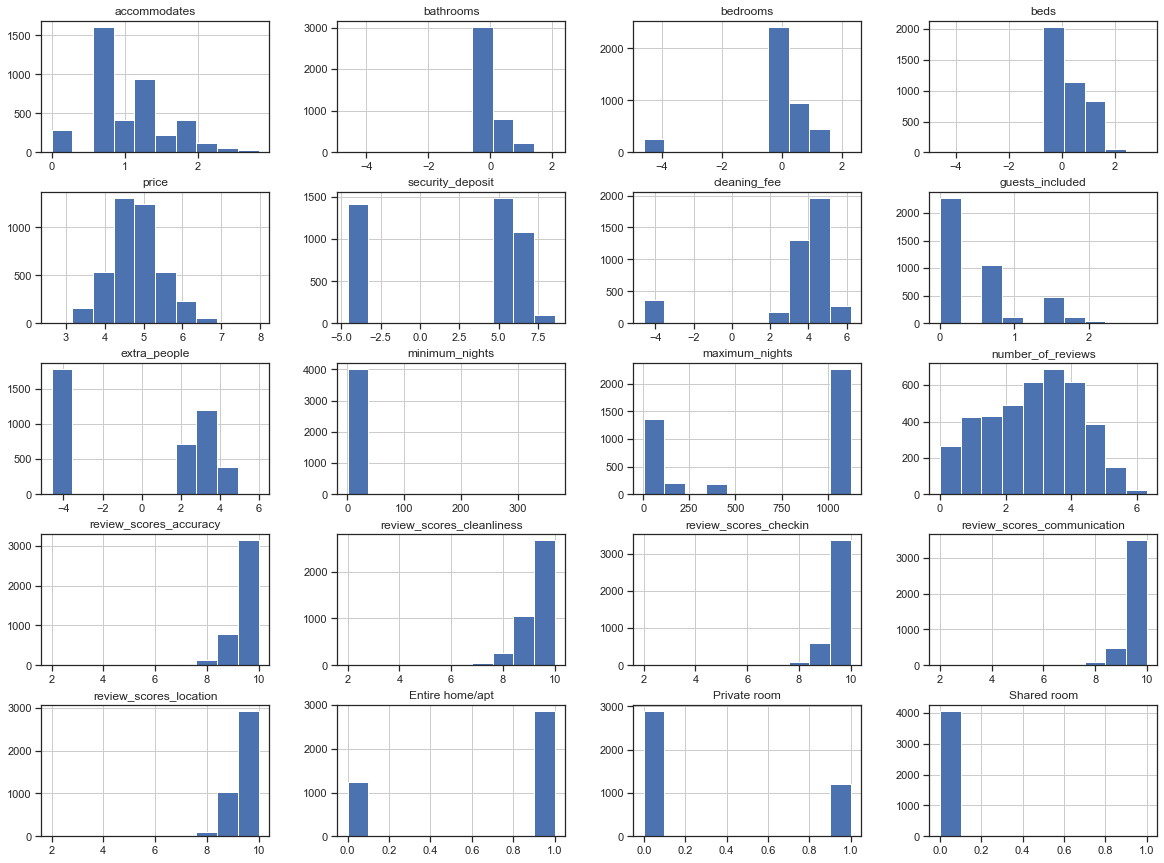

In [65]:
# Histograma de las variables
df_log.drop(columns=['latitude', 'longitude']).hist(figsize=(20,15))
plt.show()

## 1.6 Análisis de correlaciones

Para finalizar, estudiamos las correlaciones entre las variables. De esta forma, podemos decidir qué variables usar para el modelo y estudiar posibles relaciones existentes entre ellas.

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,maximum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,Entire home/apt,Private room,Shared room
latitude,1.000000,-0.091075,-0.021653,-0.009773,-0.122073,-0.068575,0.208993,0.125957,0.113179,-0.023639,...,-0.039598,0.068262,0.039334,0.020774,-0.049541,0.042834,0.201835,0.267739,-0.277968,0.043290
longitude,-0.091075,1.000000,-0.033259,-0.060077,-0.004744,-0.008516,-0.230727,-0.015991,-0.040805,-0.014152,...,-0.033767,0.062079,0.023086,0.041015,0.024773,0.016552,-0.277936,-0.053050,0.046170,0.038179
accommodates,-0.021653,-0.033259,1.000000,0.432268,0.399763,0.647452,0.645075,0.216345,0.264306,0.552794,...,0.027399,0.003628,-0.024840,0.004875,-0.002488,0.012305,0.057218,0.523266,-0.512446,-0.077142
bathrooms,-0.009773,-0.060077,0.432268,1.000000,0.311976,0.325169,0.425439,0.118171,0.150671,0.250076,...,0.010178,-0.098348,-0.054766,-0.036898,-0.030868,-0.019648,0.032292,0.143981,-0.152698,0.040161
bedrooms,-0.122073,-0.004744,0.399763,0.311976,1.000000,0.341001,0.268683,0.055502,0.057410,0.253900,...,-0.014274,-0.047950,-0.015826,-0.036513,0.022765,0.005165,0.025215,0.020208,-0.020329,-0.000149
beds,-0.068575,-0.008516,0.647452,0.325169,0.341001,1.000000,0.408312,0.129550,0.163593,0.399084,...,0.000281,-0.015476,-0.042757,-0.024976,0.009316,-0.003122,0.019079,0.307328,-0.306766,-0.014895
price,0.208993,-0.230727,0.645075,0.425439,0.268683,0.408312,1.000000,0.233418,0.251661,0.408882,...,0.020582,-0.061479,0.036385,0.074692,-0.009450,0.055333,0.175350,0.564515,-0.554010,-0.077087
security_deposit,0.125957,-0.015991,0.216345,0.118171,0.055502,0.129550,0.233418,1.000000,0.300268,0.216173,...,-0.008053,0.069358,0.013186,0.061928,-0.026827,0.010704,0.035457,0.256676,-0.250990,-0.039830
cleaning_fee,0.113179,-0.040805,0.264306,0.150671,0.057410,0.163593,0.251661,0.300268,1.000000,0.223027,...,0.016270,0.021585,-0.014143,0.045942,-0.027480,0.001032,0.033236,0.258598,-0.237739,-0.119547
guests_included,-0.023639,-0.014152,0.552794,0.250076,0.253900,0.399084,0.408882,0.216173,0.223027,1.000000,...,-0.001865,0.091006,-0.009690,0.032317,0.013592,0.016235,0.029366,0.328247,-0.321518,-0.048086


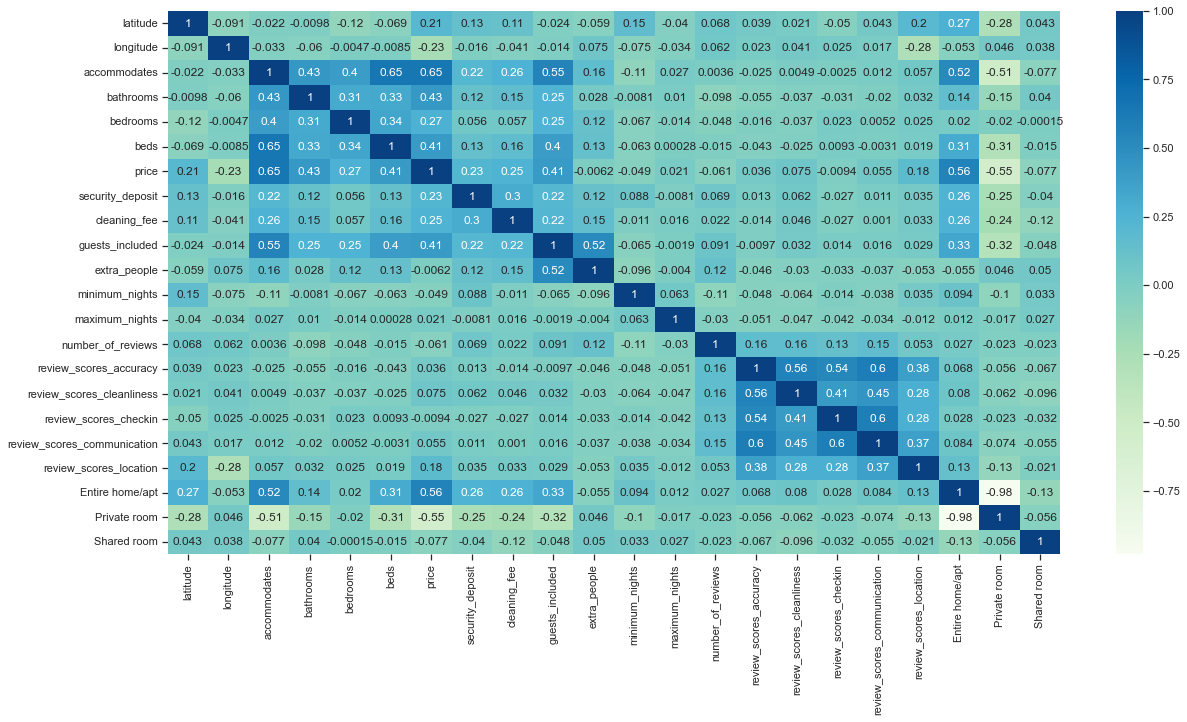

In [66]:
# Correlaciones
plt.figure(figsize=(20,10))
correlaciones= df_log.corr()
sns.heatmap(correlaciones,cmap="GnBu",annot=True) 
correlaciones

Seleccionamos las siguientes variables para el modelo:

Las variables de modelización:
* _latitude_
* _longitude_
* _bathrooms_
* _bedrooms_
* _security_deposit_
* _cleaning_fee_
* _number_of_reviews_ 
* _review_scores_accuracy_
* _Entire home/apt_
* _Private_room_
* _Shared_room_

Y la varibale de etiqueta:
* _price_

Creamos una nueva variable _review_ de la siguiente forma:

$$\text{review} = \text{review_scores_accuracy} \cdot 100\cdot \frac{\text{number_of_reviews}}{\sum \text{number_of_reviews}}$$

Esta sustituirá a las variables _number_of_reviews_ y _review_scores_accuracy_

In [67]:
# Nueva variable review
review = df['review_scores_accuracy']*(df['number_of_reviews']/sum(df['number_of_reviews'])*100)

Estudiamos la simetría de la variable mediante el coeficiente de Fisher y, en caso de que presente asimetría por la derecha, aplicamos una transformación logarítmica

In [68]:
# Coeficiente de asimetria y transformacion
print("Coeficiente de asimetría: " + str(review.skew()))
review = np.sqrt(np.sqrt(review))

Coeficiente de asimetría: 3.1453992010764096


Nos aseguramos de que la variable no contenga valores nulos (es decir, que anteriormente no haya tomado el valor 0.0 antes de aplicar la transformación)

In [69]:
# Valores nulos
review.isnull().sum()

0

# 2. División de los datos

In [70]:
# Librerias
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

En primer lugar, creamos la matriz de observaciones y el vector etiqueta con los que trabajaremos para ajustar el modelo de regresión lineal.

In [71]:
# Vector etiqueta
y = df_log['price']

# Matriz de observaciones
X = df_log[['latitude', 'longitude', 'accommodates', 'beds', 'security_deposit', 'cleaning_fee', 'extra_people',
            'Entire home/apt', 'Private room', 'Shared room']]
X.insert(7, 'review', review)

In [72]:
# Estandarizacion de los datos
objeto = StandardScaler()
X_ss = pd.DataFrame(objeto.fit_transform(X.iloc[:,0:8]), columns=list(X.iloc[:,0:8].columns))

# Concatenacion de los datos
X = pd.concat([X_ss, X.loc[:,'Entire home/apt':'Shared room'].reset_index()], axis=1)
X.drop('id', axis=1, inplace=True)
X.head(5)

,latitude,longitude,accommodates,beds,security_deposit,cleaning_fee,extra_people,review,Entire home/apt,Private room,Shared room
0,1.269929,-0.274755,1.261042,1.400105,-1.367867,0.735120,-1.133644,-0.253660,1,0,0
1,-0.404448,-0.061927,-1.967979,-0.657623,-1.367867,-3.064167,-1.133644,0.920196,0,1,0
2,-0.798196,0.127136,0.530333,0.371241,-1.367867,0.125844,-1.133644,1.955515,1,0,0
3,0.867194,0.119599,0.530333,0.371241,0.880640,0.739045,0.956087,0.609381,1,0,0
4,0.992544,-0.376765,-0.718823,-0.657623,0.688279,0.312578,-1.133644,3.093449,1,0,0


Separamos los datos en train y test

In [73]:
# Particion de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [74]:
# Librerias
import os

# Carpeta con datos
if not os.path.exists('Datos'):
    os.makedirs('Datos')
    
# Se guardan los datos
X_train.to_csv('Datos/X_train.csv', index=False)
X_test.to_csv('Datos/X_test.csv', index=False)
y_train.to_csv('Datos/y_train.csv', index=False)
y_test.to_csv('Datos/y_test.csv', index=False)